###  Importing Libraries and dataframe

In [153]:
import numpy as np
import pandas as pd
# LIBRARYS TO PLOT GRAPHS
from matplotlib import pyplot as plt
import seaborn as sns
# LIBRARYS TO BUILD MODELS
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import OrderedDict
from itertools import islice
from imblearn.metrics import sensitivity_specificity_support
from sklearn.linear_model import LogisticRegression

In [93]:
#to display all the rows and columns fully
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [94]:
df = pd.read_csv("./telecom_churn_data.csv", sep=",")

In [95]:
#Checking the data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [96]:
##checking the number of rows and columns in the dataset
df.shape

(99999, 226)

### Data Cleaning 

In [97]:
# Dropping date columns as we won't be using it
df = df.drop('last_date_of_month_6', axis=1)
df = df.drop('last_date_of_month_7', axis=1)
df = df.drop('last_date_of_month_8', axis=1)
df = df.drop('last_date_of_month_9', axis=1)
df = df.drop('date_of_last_rech_6', axis=1)
df = df.drop('date_of_last_rech_7', axis=1)
df = df.drop('date_of_last_rech_8', axis=1)
df = df.drop('date_of_last_rech_9', axis=1)
df = df.drop('date_of_last_rech_data_6', axis=1)
df = df.drop('date_of_last_rech_data_7', axis=1)
df = df.drop('date_of_last_rech_data_8', axis=1)
df = df.drop('date_of_last_rech_data_9', axis=1)

In [98]:
df.shape

(99999, 214)

In [99]:
#checking for categorical data in dataframe
df.dtypes

mobile_number           int64
circle_id               int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f

In [100]:
#df._get_numeric_data() 

### Missing Value Treatment 

In [101]:
# checking skeweness
#df.total_rech_num_6.value_counts()
(df['total_rech_num_6'].value_counts()/df.shape[0])*100

4      11.566116
3      11.445114
5      10.463105
2       9.006090
6       8.854089
7       7.026070
8       5.692057
1       5.005050
9       4.674047
10      3.876039
11      3.184032
12      2.620026
13      2.115021
14      1.746017
0       1.607016
15      1.477015
16      1.275013
17      1.068011
18      0.910009
19      0.777008
20      0.648006
21      0.541005
22      0.523005
23      0.428004
24      0.397004
25      0.364004
26      0.293003
27      0.253003
28      0.229002
29      0.202002
30      0.175002
31      0.163002
32      0.145001
33      0.123001
34      0.107001
36      0.101001
35      0.097001
37      0.072001
38      0.065001
40      0.051001
41      0.050001
42      0.049000
39      0.042000
44      0.041000
43      0.041000
45      0.037000
47      0.037000
46      0.031000
49      0.030000
51      0.024000
48      0.022000
52      0.018000
53      0.018000
50      0.017000
55      0.015000
58      0.014000
56      0.011000
59      0.011000
54      0.0100

In [102]:
# dropping columns which has more than 75% na values
df = df.drop('fb_user_6', axis=1)
df = df.drop('fb_user_7', axis=1)
df = df.drop('fb_user_8', axis=1)
df = df.drop('fb_user_9', axis=1)


df = df.drop('night_pck_user_6', axis=1)
df = df.drop('night_pck_user_7', axis=1)
df = df.drop('night_pck_user_8', axis=1)
df = df.drop('night_pck_user_9', axis=1)

df = df.drop('arpu_3g_6', axis=1)
df = df.drop('arpu_3g_7', axis=1)
df = df.drop('arpu_3g_8', axis=1)
df = df.drop('arpu_3g_9', axis=1)

df = df.drop('arpu_2g_6', axis=1)
df = df.drop('arpu_2g_7', axis=1)
df = df.drop('arpu_2g_8', axis=1)
df = df.drop('arpu_2g_9', axis=1)

df = df.drop('total_rech_data_6', axis=1)
df = df.drop('total_rech_data_7', axis=1)
df = df.drop('total_rech_data_8', axis=1)
df = df.drop('total_rech_data_9', axis=1)

df=df.drop('max_rech_data_6', axis=1)
df=df.drop('max_rech_data_7', axis=1)
df=df.drop('max_rech_data_8', axis=1)
df=df.drop('max_rech_data_9', axis=1)

df=df.drop('count_rech_2g_6', axis=1)
df=df.drop('count_rech_2g_7', axis=1)
df=df.drop('count_rech_2g_8', axis=1)
df=df.drop('count_rech_2g_9', axis=1)

df=df.drop('count_rech_3g_6', axis=1)
df=df.drop('count_rech_3g_7', axis=1)
df=df.drop('count_rech_3g_8', axis=1)
df=df.drop('count_rech_3g_9', axis=1)

df=df.drop('av_rech_amt_data_6', axis=1)
df=df.drop('av_rech_amt_data_7', axis=1)
df=df.drop('av_rech_amt_data_8', axis=1)
df=df.drop('av_rech_amt_data_9', axis=1)

In [103]:
#let's remove circle_id as it is same for all the enteries, so there is no use of this column
df=df.drop('circle_id',axis=1)

In [104]:
#(df['loc_og_t2t_mou_6'].value_counts()/df.shape[0])*100

In [105]:
# WE SEE ONE COLUMN DETAILS TO UNDERSTAND ABOVE STATEMENT
df['onnet_mou_6'].describe()

count    96062.000000
mean       132.395875
std        297.207406
min          0.000000
25%          7.380000
50%         34.310000
75%        118.740000
max       7376.710000
Name: onnet_mou_6, dtype: float64

In [106]:
#converting na values of numeric data to its median value  
df['onnet_mou_6'] = df['onnet_mou_6'].fillna(df['onnet_mou_6'].median())
df['onnet_mou_7'] = df['onnet_mou_7'].fillna(df['onnet_mou_7'].median())
df['onnet_mou_8'] = df['onnet_mou_8'].fillna(df['onnet_mou_8'].median())
df['onnet_mou_9'] = df['onnet_mou_9'].fillna(df['onnet_mou_9'].median())

df['offnet_mou_6'] = df['offnet_mou_6'].fillna(df['offnet_mou_6'].median())
df['offnet_mou_7'] = df['offnet_mou_7'].fillna(df['offnet_mou_7'].median())
df['offnet_mou_8'] = df['offnet_mou_8'].fillna(df['offnet_mou_8'].median())
df['offnet_mou_9'] = df['offnet_mou_9'].fillna(df['offnet_mou_9'].median())

df['roam_og_mou_6'] = df['roam_og_mou_6'].fillna(df['roam_og_mou_6'].median())
df['roam_og_mou_7'] = df['roam_og_mou_7'].fillna(df['roam_og_mou_7'].median())
df['roam_og_mou_8'] = df['roam_og_mou_8'].fillna(df['roam_og_mou_8'].median())
df['roam_og_mou_9'] = df['roam_og_mou_9'].fillna(df['roam_og_mou_9'].median())

df['roam_ic_mou_6'] = df['roam_ic_mou_6'].fillna(df['roam_ic_mou_6'].median())
df['roam_ic_mou_7'] = df['roam_ic_mou_7'].fillna(df['roam_ic_mou_7'].median())
df['roam_ic_mou_8'] = df['roam_ic_mou_8'].fillna(df['roam_ic_mou_8'].median())
df['roam_ic_mou_9'] = df['roam_ic_mou_9'].fillna(df['roam_ic_mou_9'].median())

df['loc_og_t2t_mou_6'] = df['loc_og_t2t_mou_6'].fillna(df['loc_og_t2t_mou_6'].median())
df['loc_og_t2t_mou_7'] = df['loc_og_t2t_mou_7'].fillna(df['loc_og_t2t_mou_7'].median())
df['loc_og_t2t_mou_8'] = df['loc_og_t2t_mou_8'].fillna(df['loc_og_t2t_mou_8'].median())
df['loc_og_t2t_mou_9'] = df['loc_og_t2t_mou_9'].fillna(df['loc_og_t2t_mou_9'].median())

df['loc_og_t2m_mou_6'] = df['loc_og_t2m_mou_6'].fillna(df['loc_og_t2m_mou_6'].median())
df['loc_og_t2m_mou_7'] = df['loc_og_t2m_mou_7'].fillna(df['loc_og_t2m_mou_7'].median())
df['loc_og_t2m_mou_8'] = df['loc_og_t2m_mou_8'].fillna(df['loc_og_t2m_mou_8'].median())
df['loc_og_t2m_mou_9'] = df['loc_og_t2m_mou_9'].fillna(df['loc_og_t2m_mou_9'].median())

df['loc_og_t2f_mou_6'] = df['loc_og_t2f_mou_6'].fillna(df['loc_og_t2f_mou_6'].median())
df['loc_og_t2f_mou_7'] = df['loc_og_t2f_mou_7'].fillna(df['loc_og_t2f_mou_7'].median())
df['loc_og_t2f_mou_8'] = df['loc_og_t2f_mou_8'].fillna(df['loc_og_t2f_mou_8'].median())
df['loc_og_t2f_mou_9'] = df['loc_og_t2f_mou_9'].fillna(df['loc_og_t2f_mou_9'].median())

df['loc_og_t2c_mou_6'] = df['loc_og_t2c_mou_6'].fillna(df['loc_og_t2c_mou_6'].median())
df['loc_og_t2c_mou_7'] = df['loc_og_t2c_mou_7'].fillna(df['loc_og_t2c_mou_7'].median())
df['loc_og_t2c_mou_8'] = df['loc_og_t2c_mou_8'].fillna(df['loc_og_t2c_mou_8'].median())
df['loc_og_t2c_mou_9'] = df['loc_og_t2c_mou_9'].fillna(df['loc_og_t2c_mou_9'].median())

df['loc_og_mou_6'] = df['loc_og_mou_6'].fillna(df['loc_og_mou_6'].median())
df['loc_og_mou_7'] = df['loc_og_mou_7'].fillna(df['loc_og_mou_7'].median())
df['loc_og_mou_8'] = df['loc_og_mou_8'].fillna(df['loc_og_mou_8'].median())
df['loc_og_mou_9'] = df['loc_og_mou_9'].fillna(df['loc_og_mou_9'].median())

df['std_og_t2t_mou_6'] = df['std_og_t2t_mou_6'].fillna(df['std_og_t2t_mou_6'].median())
df['std_og_t2t_mou_7'] = df['std_og_t2t_mou_7'].fillna(df['std_og_t2t_mou_7'].median())
df['std_og_t2t_mou_8'] = df['std_og_t2t_mou_8'].fillna(df['std_og_t2t_mou_8'].median())
df['std_og_t2t_mou_9'] = df['std_og_t2t_mou_9'].fillna(df['std_og_t2t_mou_9'].median())

df['std_og_t2m_mou_6'] = df['std_og_t2m_mou_6'].fillna(df['std_og_t2m_mou_6'].median())
df['std_og_t2m_mou_7'] = df['std_og_t2m_mou_7'].fillna(df['std_og_t2m_mou_7'].median())
df['std_og_t2m_mou_8'] = df['std_og_t2m_mou_8'].fillna(df['std_og_t2m_mou_8'].median())
df['std_og_t2m_mou_9'] = df['std_og_t2m_mou_9'].fillna(df['std_og_t2m_mou_9'].median())

df['std_og_t2f_mou_6'] = df['std_og_t2f_mou_6'].fillna(df['std_og_t2f_mou_6'].median())
df['std_og_t2f_mou_7'] = df['std_og_t2f_mou_7'].fillna(df['std_og_t2f_mou_7'].median())
df['std_og_t2f_mou_8'] = df['std_og_t2f_mou_8'].fillna(df['std_og_t2f_mou_8'].median())
df['std_og_t2f_mou_9'] = df['std_og_t2f_mou_9'].fillna(df['std_og_t2f_mou_9'].median())

df['std_og_t2c_mou_6'] = df['std_og_t2c_mou_6'].fillna(df['std_og_t2c_mou_6'].median())
df['std_og_t2c_mou_7'] = df['std_og_t2c_mou_7'].fillna(df['std_og_t2c_mou_7'].median())
df['std_og_t2c_mou_8'] = df['std_og_t2c_mou_8'].fillna(df['std_og_t2c_mou_8'].median())
df['std_og_t2c_mou_9'] = df['std_og_t2c_mou_9'].fillna(df['std_og_t2c_mou_9'].median())

df['std_og_mou_6'] = df['std_og_mou_6'].fillna(df['std_og_mou_6'].median())
df['std_og_mou_7'] = df['std_og_mou_7'].fillna(df['std_og_mou_7'].median())
df['std_og_mou_8'] = df['std_og_mou_8'].fillna(df['std_og_mou_8'].median())
df['std_og_mou_9'] = df['std_og_mou_9'].fillna(df['std_og_mou_9'].median())

df['isd_og_mou_6'] = df['isd_og_mou_6'].fillna(df['isd_og_mou_6'].median())
df['isd_og_mou_7'] = df['isd_og_mou_7'].fillna(df['isd_og_mou_7'].median())
df['isd_og_mou_8'] = df['isd_og_mou_8'].fillna(df['isd_og_mou_8'].median())
df['isd_og_mou_9'] = df['isd_og_mou_9'].fillna(df['isd_og_mou_9'].median())

df['spl_og_mou_6'] = df['spl_og_mou_6'].fillna(df['spl_og_mou_6'].median())
df['spl_og_mou_7'] = df['spl_og_mou_7'].fillna(df['spl_og_mou_7'].median())
df['spl_og_mou_8'] = df['spl_og_mou_8'].fillna(df['spl_og_mou_8'].median())
df['spl_og_mou_9'] = df['spl_og_mou_9'].fillna(df['spl_og_mou_9'].median())

df['og_others_6'] = df['og_others_6'].fillna(df['og_others_6'].median())
df['og_others_7'] = df['og_others_7'].fillna(df['og_others_7'].median())
df['og_others_8'] = df['og_others_8'].fillna(df['og_others_8'].median())
df['og_others_9'] = df['og_others_9'].fillna(df['og_others_9'].median())

df['total_og_mou_6'] = df['total_og_mou_6'].fillna(df['total_og_mou_6'].median())
df['total_og_mou_7'] = df['total_og_mou_7'].fillna(df['total_og_mou_7'].median())
df['total_og_mou_8'] = df['total_og_mou_8'].fillna(df['total_og_mou_8'].median())
df['total_og_mou_9'] = df['total_og_mou_9'].fillna(df['total_og_mou_9'].median())

df['loc_ic_t2t_mou_6'] = df['loc_ic_t2t_mou_6'].fillna(df['loc_ic_t2t_mou_6'].median())
df['loc_ic_t2t_mou_7'] = df['loc_ic_t2t_mou_7'].fillna(df['loc_ic_t2t_mou_7'].median())
df['loc_ic_t2t_mou_8'] = df['loc_ic_t2t_mou_8'].fillna(df['loc_ic_t2t_mou_8'].median())
df['loc_ic_t2t_mou_9'] = df['loc_ic_t2t_mou_9'].fillna(df['loc_ic_t2t_mou_9'].median())

df['loc_ic_t2m_mou_6'] = df['loc_ic_t2m_mou_6'].fillna(df['loc_ic_t2m_mou_6'].median())
df['loc_ic_t2m_mou_7'] = df['loc_ic_t2m_mou_7'].fillna(df['loc_ic_t2m_mou_7'].median())
df['loc_ic_t2m_mou_8'] = df['loc_ic_t2m_mou_8'].fillna(df['loc_ic_t2m_mou_8'].median())
df['loc_ic_t2m_mou_9'] = df['loc_ic_t2m_mou_9'].fillna(df['loc_ic_t2m_mou_9'].median())

df['loc_ic_t2f_mou_6'] = df['loc_ic_t2f_mou_6'].fillna(df['loc_ic_t2f_mou_6'].median())
df['loc_ic_t2f_mou_7'] = df['loc_ic_t2f_mou_7'].fillna(df['loc_ic_t2f_mou_7'].median())
df['loc_ic_t2f_mou_8'] = df['loc_ic_t2f_mou_8'].fillna(df['loc_ic_t2f_mou_8'].median())
df['loc_ic_t2f_mou_9'] = df['loc_ic_t2f_mou_9'].fillna(df['loc_ic_t2f_mou_9'].median())

df['loc_ic_mou_6'] = df['loc_ic_mou_6'].fillna(df['loc_ic_mou_6'].median())
df['loc_ic_mou_7'] = df['loc_ic_mou_7'].fillna(df['loc_ic_mou_7'].median())
df['loc_ic_mou_8'] = df['loc_ic_mou_8'].fillna(df['loc_ic_mou_8'].median())
df['loc_ic_mou_9'] = df['loc_ic_mou_9'].fillna(df['loc_ic_mou_9'].median())

df['std_ic_t2t_mou_6'] = df['std_ic_t2t_mou_6'].fillna(df['std_ic_t2t_mou_6'].median())
df['std_ic_t2t_mou_7'] = df['std_ic_t2t_mou_7'].fillna(df['std_ic_t2t_mou_7'].median())
df['std_ic_t2t_mou_8'] = df['std_ic_t2t_mou_8'].fillna(df['std_ic_t2t_mou_8'].median())
df['std_ic_t2t_mou_9'] = df['std_ic_t2t_mou_9'].fillna(df['std_ic_t2t_mou_9'].median())

df['std_ic_t2m_mou_6'] = df['std_ic_t2m_mou_6'].fillna(df['std_ic_t2m_mou_6'].median())
df['std_ic_t2m_mou_7'] = df['std_ic_t2m_mou_7'].fillna(df['std_ic_t2m_mou_7'].median())
df['std_ic_t2m_mou_8'] = df['std_ic_t2m_mou_8'].fillna(df['std_ic_t2m_mou_8'].median())
df['std_ic_t2m_mou_9'] = df['std_ic_t2m_mou_9'].fillna(df['std_ic_t2m_mou_9'].median())

df['std_ic_t2f_mou_6'] = df['std_ic_t2f_mou_6'].fillna(df['std_ic_t2f_mou_6'].median())
df['std_ic_t2f_mou_7'] = df['std_ic_t2f_mou_7'].fillna(df['std_ic_t2f_mou_7'].median())
df['std_ic_t2f_mou_8'] = df['std_ic_t2f_mou_8'].fillna(df['std_ic_t2f_mou_8'].median())
df['std_ic_t2f_mou_9'] = df['std_ic_t2f_mou_9'].fillna(df['std_ic_t2f_mou_9'].median())

df['std_ic_t2o_mou_6'] = df['std_ic_t2o_mou_6'].fillna(df['std_ic_t2o_mou_6'].median())
df['std_ic_t2o_mou_7'] = df['std_ic_t2o_mou_7'].fillna(df['std_ic_t2o_mou_7'].median())
df['std_ic_t2o_mou_8'] = df['std_ic_t2o_mou_8'].fillna(df['std_ic_t2o_mou_8'].median())
df['std_ic_t2o_mou_9'] = df['std_ic_t2o_mou_9'].fillna(df['std_ic_t2o_mou_9'].median())

df['std_ic_mou_6'] = df['std_ic_mou_6'].fillna(df['std_ic_mou_6'].median())
df['std_ic_mou_7'] = df['std_ic_mou_7'].fillna(df['std_ic_mou_7'].median())
df['std_ic_mou_8'] = df['std_ic_mou_8'].fillna(df['std_ic_mou_8'].median())
df['std_ic_mou_9'] = df['std_ic_mou_9'].fillna(df['std_ic_mou_9'].median())

df['total_ic_mou_6'] = df['total_ic_mou_6'].fillna(df['total_ic_mou_6'].median())
df['total_ic_mou_7'] = df['total_ic_mou_7'].fillna(df['total_ic_mou_7'].median())
df['total_ic_mou_8'] = df['total_ic_mou_8'].fillna(df['total_ic_mou_8'].median())
df['total_ic_mou_9'] = df['total_ic_mou_9'].fillna(df['total_ic_mou_9'].median())

df['spl_ic_mou_6'] = df['spl_ic_mou_6'].fillna(df['spl_ic_mou_6'].median())
df['spl_ic_mou_7'] = df['spl_ic_mou_7'].fillna(df['spl_ic_mou_7'].median())
df['spl_ic_mou_8'] = df['spl_ic_mou_8'].fillna(df['spl_ic_mou_8'].median())
df['spl_ic_mou_9'] = df['spl_ic_mou_9'].fillna(df['spl_ic_mou_9'].median())

df['isd_ic_mou_6'] = df['isd_ic_mou_6'].fillna(df['isd_ic_mou_6'].median())
df['isd_ic_mou_7'] = df['isd_ic_mou_7'].fillna(df['isd_ic_mou_7'].median())
df['isd_ic_mou_8'] = df['isd_ic_mou_8'].fillna(df['isd_ic_mou_8'].median())
df['isd_ic_mou_9'] = df['isd_ic_mou_9'].fillna(df['isd_ic_mou_9'].median())

df['ic_others_6'] = df['ic_others_6'].fillna(df['ic_others_6'].median())
df['ic_others_7'] = df['ic_others_7'].fillna(df['ic_others_7'].median())
df['ic_others_8'] = df['ic_others_8'].fillna(df['ic_others_8'].median())
df['ic_others_9'] = df['ic_others_9'].fillna(df['ic_others_9'].median())

df['loc_og_t2o_mou'] = df['loc_og_t2o_mou'].fillna(df['loc_og_t2o_mou'].median())
df['std_og_t2o_mou'] = df['std_og_t2o_mou'].fillna(df['std_og_t2o_mou'].median())
df['loc_ic_t2o_mou'] = df['loc_ic_t2o_mou'].fillna(df['loc_ic_t2o_mou'].median())

In [107]:
# checking if is any null value in the dataset
round(df.isnull().sum()/len(df.index), 2)*100

mobile_number         0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_m

In [108]:
df.shape

(99999, 177)

In [109]:
#Selecting top 20% of customers as they only make 80% of profit
df['avg_rech_amt']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [110]:
df['avg_rech_amt'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rech_amt, dtype: float64

In [111]:
#selecting top 70 percentile
hcv=df['avg_rech_amt'].quantile(0.7)
hcv

368.5

##### 368.5 is the top 70% which is the hvc value and if avg is > 368.5 then they are HCV

In [112]:
df=df[df['avg_rech_amt']>=hcv]
df.shape

(30011, 178)

In [113]:
df.head(5)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0

In [114]:
#assigning 1 and 0
df['churn']=np.where((df.total_ic_mou_9==0) & (df.total_og_mou_9==0) & 
                             (df.vol_2g_mb_9==0) & (df.vol_3g_mb_9==0),1,0)

In [115]:
# counting chur and non churn 
df['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [116]:
round((df['churn'].value_counts()/df['churn'].count())*100,2)

0    91.36
1     8.64
Name: churn, dtype: float64

In [117]:
#Removing 9th month column
df.drop(list(df.filter(regex='_9')),axis=1,inplace=True)
df.shape

(30011, 137)

### Data Preperation

In [118]:
# Checking the skeweness of the columns
#round((telecom_df['sachet_2g_6'].value_counts()/telecom_df.shape[0])*100,2)

In [119]:
#Dropping highly skewed columns
df.drop(['sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8',
                'aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','og_others_8'],
               axis=1,inplace=True)

In [120]:
#Dropping columns which had 100% of 0.0 value
df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                 'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)

In [121]:
df.shape

(30011, 117)

In  onth 6 and 7 customers show good behaviour, therefore taking an avg of those 2 months 

In [122]:
#Deriving new columns
df['avg_arpu']=df[['arpu_6','arpu_7']].mean(axis=1)
df['avg_onnet_mou']=df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['avg_offnet_mou']=df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['avg_roam_ic_mou']=df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['avg_roam_og_mou']=df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['avg_loc_og_t2t_mou']=df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['avg_loc_og_t2m_mou']=df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['avg_loc_og_t2f_mou']=df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['avg_loc_og_t2c_mou']=df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['avg_loc_og_mou']=df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['avg_std_og_t2t_mou']=df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['avg_std_og_t2m_mou']=df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['avg_std_og_t2f_mou']=df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['avg_std_og_mou']=df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['avg_isd_og_mou']=df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['avg_spl_og_mou']=df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['avg_og_others']=df[['og_others_6','og_others_7']].mean(axis=1)
df['avg_total_og_mou']=df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['avg_loc_ic_t2t_mou']=df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['avg_loc_ic_t2m_mou']=df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['avg_loc_ic_t2f_mou']=df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['avg_loc_ic_mou']=df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['avg_std_ic_t2t_mou']=df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['avg_std_ic_t2m_mou']=df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['avg_std_ic_t2f_mou']=df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['avg_std_ic_mou']=df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['avg_total_ic_mou']=df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['avg_spl_ic_mou']=df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['avg_isd_ic_mou']=df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['avg_ic_others']=df[['ic_others_6','ic_others_7']].mean(axis=1)
df['avg_total_rech_num']=df[['total_rech_num_6','total_rech_num_7']].mean(axis=1)
df['avg_total_rech_amt']=df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['avg_max_rech_amt']=df[['max_rech_amt_6','max_rech_amt_7']].mean(axis=1)
df['avg_last_day_rch_amt']=df[['last_day_rch_amt_6','last_day_rch_amt_7']].mean(axis=1)
df['avg_vol_2g_mb']=df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['avg_vol_3g_mb']=df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['avg_monthly_2g']=df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['avg_monthly_3g']=df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)

In [123]:
df.shape

(30011, 155)

In [124]:
# the difference btwn 7th month and 6th month
df['onnet_mou_7_6']=df['onnet_mou_7']-df['onnet_mou_6']
df['offnet_mou_7_6']=df['offnet_mou_7']-df['offnet_mou_6']
df['roam_ic_mou_7_6']=df['roam_ic_mou_7']-df['roam_ic_mou_6']
df['roam_og_mou_7_6']=df['roam_og_mou_7']-df['roam_og_mou_6']
df['loc_og_t2t_mou_7_6']=df['loc_og_t2t_mou_7']-df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_7_6']=df['loc_og_t2m_mou_7']-df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_7_6']=df['loc_og_t2f_mou_7']-df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_7_6']=df['loc_og_t2c_mou_7']-df['loc_og_t2c_mou_6']
df['loc_og_mou_7_6']=df['loc_og_mou_7']-df['loc_og_mou_6']
df['std_og_t2t_mou_7_6']=df['std_og_t2t_mou_7']-df['std_og_t2t_mou_6']
df['std_og_t2m_mou_7_6']=df['std_og_t2m_mou_7']-df['std_og_t2m_mou_6']
df['std_og_t2f_mou_7_6']=df['std_og_t2f_mou_7']-df['std_og_t2f_mou_6']
df['std_og_mou_7_6']=df['std_og_mou_7']-df['std_og_mou_6']
df['isd_og_mou_7_6']=df['isd_og_mou_7']-df['isd_og_mou_6']
df['spl_og_mou_7_6']=df['spl_og_mou_7']-df['spl_og_mou_6']
df['og_others_7_6']=df['og_others_7']-df['og_others_6']
df['total_og_mou_7_6']=df['total_og_mou_7']-df['total_og_mou_6']
df['loc_ic_t2t_mou_7_6']=df['loc_ic_t2t_mou_7']-df['loc_ic_t2t_mou_6']
df['loc_ic_t2m_mou_7_6']=df['loc_ic_t2m_mou_7']-df['loc_ic_t2m_mou_6']
df['loc_ic_t2f_mou_7_6']=df['loc_ic_t2f_mou_7']-df['loc_ic_t2f_mou_6']
df['loc_ic_mou_7_6']=df['loc_ic_mou_7']-df['loc_ic_mou_6']
df['std_ic_t2t_mou_7_6']=df['std_ic_t2t_mou_7']-df['std_ic_t2t_mou_6']
df['std_ic_t2m_mou_7_6']=df['std_ic_t2m_mou_7']-df['std_ic_t2m_mou_6']
df['std_ic_t2f_mou_7_6']=df['std_ic_t2f_mou_7']-df['std_ic_t2f_mou_6']
df['std_ic_mou_7_6']=df['std_ic_mou_7']-df['std_ic_mou_6']
df['total_ic_mou_7_6']=df['total_ic_mou_7']-df['total_ic_mou_6']
df['spl_ic_mou_7_6']=df['spl_ic_mou_7']-df['spl_ic_mou_6']
df['isd_ic_mou_7_6']=df['isd_ic_mou_7']-df['isd_ic_mou_6']
df['ic_others_7_6']=df['ic_others_7']-df['ic_others_6']
df['total_rech_num_7_6']=df['total_rech_num_7']-df['total_rech_num_6']
df['total_rech_amt_7_6']=df['total_rech_amt_7']-df['total_rech_amt_6']
df['max_rech_amt_7_6']=df['max_rech_amt_7']-df['max_rech_amt_6']
df['last_day_rch_amt_7_6']=df['last_day_rch_amt_7']-df['last_day_rch_amt_6']
df['vol_2g_mb_7_6']=df['vol_2g_mb_7']-df['vol_2g_mb_6']
df['vol_3g_mb_7_6']=df['vol_3g_mb_7']-df['vol_3g_mb_6']
df['monthly_2g_7_6']=df['monthly_2g_7']-df['monthly_2g_6']
df['monthly_3g_7_6']=df['monthly_3g_7']-df['monthly_3g_6']

In [125]:
#difference between 8th month and 7th month
df['onnet_mou_8_7']=df['onnet_mou_8']-df['onnet_mou_7']
df['offnet_mou_8_7']=df['offnet_mou_8']-df['offnet_mou_7']
df['roam_ic_mou_8_7']=df['roam_ic_mou_8']-df['roam_ic_mou_7']
df['roam_og_mou_8_7']=df['roam_og_mou_8']-df['roam_og_mou_7']
df['loc_og_t2t_mou_8_7']=df['loc_og_t2t_mou_8']-df['loc_og_t2t_mou_7']
df['loc_og_t2m_mou_8_7']=df['loc_og_t2m_mou_8']-df['loc_og_t2m_mou_7']
df['loc_og_t2f_mou_8_7']=df['loc_og_t2f_mou_8']-df['loc_og_t2f_mou_7']
df['loc_og_t2c_mou_8_7']=df['loc_og_t2c_mou_8']-df['loc_og_t2c_mou_7']
df['loc_og_mou_8_7']=df['loc_og_mou_8']-df['loc_og_mou_7']
df['std_og_t2t_mou_8_7']=df['std_og_t2t_mou_8']-df['std_og_t2t_mou_7']
df['std_og_t2m_mou_8_7']=df['std_og_t2m_mou_8']-df['std_og_t2m_mou_7']
df['std_og_t2f_mou_8_7']=df['std_og_t2f_mou_8']-df['std_og_t2f_mou_7']
df['std_og_mou_8_7']=df['std_og_mou_8']-df['std_og_mou_7']
df['isd_og_mou_8_7']=df['isd_og_mou_8']-df['isd_og_mou_7']
df['spl_og_mou_8_7']=df['spl_og_mou_8']-df['spl_og_mou_7']
df['total_og_mou_8_7']=df['total_og_mou_8']-df['total_og_mou_7']
df['loc_ic_t2t_mou_8_7']=df['loc_ic_t2t_mou_8']-df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_8_7']=df['loc_ic_t2m_mou_8']-df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_8_7']=df['loc_ic_t2f_mou_8']-df['loc_ic_t2f_mou_7']
df['loc_ic_mou_8_7']=df['loc_ic_mou_8']-df['loc_ic_mou_7']
df['std_ic_t2t_mou_8_7']=df['std_ic_t2t_mou_8']-df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_8_7']=df['std_ic_t2m_mou_8']-df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_8_7']=df['std_ic_t2f_mou_8']-df['std_ic_t2f_mou_7']
df['std_ic_mou_8_7']=df['std_ic_mou_8']-df['std_ic_mou_7']
df['total_ic_mou_8_7']=df['total_ic_mou_8']-df['total_ic_mou_7']
df['spl_ic_mou_8_7']=df['spl_ic_mou_8']-df['spl_ic_mou_7']
df['isd_ic_mou_8_7']=df['isd_ic_mou_8']-df['isd_ic_mou_7']
df['ic_others_8_7']=df['ic_others_8']-df['ic_others_7']
df['total_rech_num_8_7']=df['total_rech_num_8']-df['total_rech_num_7']
df['total_rech_amt_8_7']=df['total_rech_amt_8']-df['total_rech_amt_7']
df['max_rech_amt_8_7']=df['max_rech_amt_8']-df['max_rech_amt_7']
df['last_day_rch_amt_8_7']=df['last_day_rch_amt_8']-df['last_day_rch_amt_7']
df['vol_2g_mb_8_7']=df['vol_2g_mb_8']-df['vol_2g_mb_7']
df['vol_3g_mb_8_7']=df['vol_3g_mb_8']-df['vol_3g_mb_7']
df['monthly_2g_8_7']=df['monthly_2g_8']-df['monthly_2g_7']
df['monthly_3g_8_7']=df['monthly_3g_8']-df['monthly_3g_7']

In [126]:
df.shape

(30011, 228)

In [127]:
# DROPPING RAW COLUMNS OF 6th & 7th MONTH
df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7',
                 'roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
                 'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6','loc_og_mou_7',
                 'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6',
                 'std_og_t2f_mou_7','std_og_mou_6','std_og_mou_7','isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7',
                 'og_others_6','og_others_7','total_og_mou_6','total_og_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7',
                 'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_mou_6','loc_ic_mou_7',
                 'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2f_mou_6',
                 'std_ic_t2f_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','spl_ic_mou_6',
                 'spl_ic_mou_7','isd_ic_mou_6','isd_ic_mou_7','ic_others_6','ic_others_7','total_rech_num_6',
                 'total_rech_num_7','total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7',
                 'last_day_rch_amt_6','last_day_rch_amt_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7',
                 'monthly_2g_6','monthly_2g_7','monthly_3g_6','monthly_3g_7'],
                axis=1,inplace=True)

In [128]:
df.shape

(30011, 152)


CREATING A NEW FEATURE BASED ON 8th MONTH AND AVERAGE OF 6 & 7th MONTH. WE MARK 0 IF 8>AVG(6,7) & 1 IF 8<AVG(6,7)

In [130]:
df['flag_arpu']=np.where((df['arpu_8'] > df['avg_arpu']), 0, 1)
df['flag_onnet_mou']=np.where((df['onnet_mou_8'] > df['avg_onnet_mou']), 0, 1)
df['flag_offnet_mou']=np.where((df['offnet_mou_8'] > df['avg_offnet_mou']), 0, 1)
df['flag_roam_ic_mou']=np.where((df['roam_ic_mou_8'] > df['avg_roam_ic_mou']), 0, 1)
df['flag_roam_og_mou']=np.where((df['roam_og_mou_8'] > df['avg_roam_og_mou']), 0, 1)
df['flag_loc_og_t2t_mou']=np.where((df['loc_og_t2t_mou_8'] > df['avg_loc_og_t2t_mou']), 0, 1)
df['flag_loc_og_t2m_mou']=np.where((df['loc_og_t2m_mou_8'] > df['avg_loc_og_t2m_mou']), 0, 1)
df['flag_loc_og_t2f_mou']=np.where((df['loc_og_t2f_mou_8'] > df['avg_loc_og_t2f_mou']), 0, 1)
df['flag_loc_og_t2c_mou']=np.where((df['loc_og_t2c_mou_8'] > df['avg_loc_og_t2c_mou']), 0, 1)
df['flag_loc_og_mou']=np.where((df['loc_og_mou_8'] > df['avg_loc_og_mou']), 0, 1)
df['flag_std_og_t2t_mou']=np.where((df['std_og_t2t_mou_8'] > df['avg_std_og_t2t_mou']), 0, 1)
df['flag_std_og_t2m_mou']=np.where((df['std_og_t2m_mou_8'] > df['avg_std_og_t2m_mou']), 0, 1)
df['flag_std_og_t2f_mou']=np.where((df['std_og_t2f_mou_8'] > df['avg_std_og_t2f_mou']), 0, 1)
df['flag_std_og_mou']=np.where((df['std_og_mou_8'] > df['avg_std_og_mou']), 0, 1)
df['flag_isd_og_mou']=np.where((df['isd_og_mou_8'] > df['avg_isd_og_mou']), 0, 1)
df['flag_spl_og_mou']=np.where((df['spl_og_mou_8'] > df['avg_spl_og_mou']), 0, 1)
df['flag_total_og_mou']=np.where((df['total_og_mou_8'] > df['avg_total_og_mou']), 0, 1)
df['flag_loc_ic_t2t_mou']=np.where((df['loc_ic_t2t_mou_8'] > df['avg_loc_ic_t2t_mou']), 0, 1)
df['flag_loc_ic_t2m_mou']=np.where((df['loc_ic_t2m_mou_8'] > df['avg_loc_ic_t2m_mou']), 0, 1)
df['flag_loc_ic_t2f_mou']=np.where((df['loc_ic_t2f_mou_8'] > df['avg_loc_ic_t2f_mou']), 0, 1)
df['flag_loc_ic_mou']=np.where((df['loc_ic_mou_8'] > df['avg_loc_ic_mou']), 0, 1)
df['flag_std_ic_t2t_mou']=np.where((df['std_ic_t2t_mou_8'] > df['avg_std_ic_t2t_mou']), 0, 1)
df['flag_std_ic_t2m_mou']=np.where((df['std_ic_t2m_mou_8'] > df['avg_std_ic_t2m_mou']), 0, 1)
df['flag_std_ic_t2f_mou']=np.where((df['std_ic_t2f_mou_8'] > df['avg_std_ic_t2f_mou']), 0, 1)
df['flag_std_ic_mou']=np.where((df['std_ic_mou_8'] > df['avg_std_ic_mou']), 0, 1)
df['flag_total_ic_mou']=np.where((df['total_ic_mou_8'] > df['avg_total_ic_mou']), 0, 1)
df['flag_spl_ic_mou']=np.where((df['spl_ic_mou_8'] > df['avg_spl_ic_mou']), 0, 1)
df['flag_isd_ic_mou']=np.where((df['isd_ic_mou_8'] > df['avg_isd_ic_mou']), 0, 1)
df['flag_ic_others']=np.where((df['ic_others_8'] > df['avg_ic_others']), 0, 1)
df['flag_total_rech_num']=np.where((df['total_rech_num_8'] > df['avg_total_rech_num']), 0, 1)
df['flag_total_rech_amt']=np.where((df['total_rech_amt_8'] > df['avg_total_rech_amt']), 0, 1)
df['flag_max_rech_amt']=np.where((df['max_rech_amt_8'] > df['avg_max_rech_amt']), 0, 1)
df['flag_last_day_rch_amt']=np.where((df['last_day_rch_amt_8'] > df['avg_last_day_rch_amt']), 0, 1)
df['flag_vol_2g_mb']=np.where((df['vol_2g_mb_8'] > df['avg_vol_2g_mb']), 0, 1)
df['flag_vol_3g_mb']=np.where((df['vol_3g_mb_8'] > df['avg_vol_3g_mb']), 0, 1)
df['flag_monthly_2g']=np.where((df['monthly_2g_8'] > df['avg_monthly_2g']), 0, 1)
df['flag_monthly_3g']=np.where((df['monthly_3g_8'] > df['avg_monthly_3g']), 0, 1)

In [131]:
df.shape

(30011, 189)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 189 entries, mobile_number to flag_monthly_3g
dtypes: float64(131), int32(38), int64(20)
memory usage: 39.2 MB


In [133]:
#changing the datatype of colums from int to categorical as only the values are integer but datatype should be categorial that is category
df['churn']=df['churn'].astype('category')
df['flag_arpu']=df['flag_arpu'].astype('category')
df['flag_onnet_mou']=df['flag_onnet_mou'].astype('category')
df['flag_offnet_mou']=df['flag_offnet_mou'].astype('category')
df['flag_roam_ic_mou']=df['flag_roam_ic_mou'].astype('category')
df['flag_roam_og_mou']=df['flag_roam_og_mou'].astype('category')
df['flag_loc_og_t2t_mou']=df['flag_loc_og_t2t_mou'].astype('category')
df['flag_loc_og_t2m_mou']=df['flag_loc_og_t2m_mou'].astype('category')
df['flag_loc_og_t2f_mou']=df['flag_loc_og_t2f_mou'].astype('category')
df['flag_loc_og_t2c_mou']=df['flag_loc_og_t2c_mou'].astype('category')
df['flag_loc_og_mou']=df['flag_loc_og_mou'].astype('category')
df['flag_std_og_t2t_mou']=df['flag_std_og_t2t_mou'].astype('category')
df['flag_std_og_t2m_mou']=df['flag_std_og_t2m_mou'].astype('category')
df['flag_std_og_t2f_mou']=df['flag_std_og_t2f_mou'].astype('category')
df['flag_std_og_mou']=df['flag_std_og_mou'].astype('category')
df['flag_isd_og_mou']=df['flag_isd_og_mou'].astype('category')
df['flag_spl_og_mou']=df['flag_spl_og_mou'].astype('category')
df['flag_total_og_mou']=df['flag_total_og_mou'].astype('category')
df['flag_loc_ic_t2t_mou']=df['flag_loc_ic_t2t_mou'].astype('category')
df['flag_loc_ic_t2m_mou']=df['flag_loc_ic_t2m_mou'].astype('category')
df['flag_loc_ic_t2f_mou']=df['flag_loc_ic_t2f_mou'].astype('category')
df['flag_loc_ic_mou']=df['flag_loc_ic_mou'].astype('category')
df['flag_std_ic_t2t_mou']=df['flag_std_ic_t2t_mou'].astype('category')
df['flag_std_ic_t2m_mou']=df['flag_std_ic_t2m_mou'].astype('category')
df['flag_std_ic_t2f_mou']=df['flag_std_ic_t2f_mou'].astype('category')
df['flag_std_ic_mou']=df['flag_std_ic_mou'].astype('category')
df['flag_total_ic_mou']=df['flag_total_ic_mou'].astype('category')
df['flag_spl_ic_mou']=df['flag_spl_ic_mou'].astype('category')
df['flag_isd_ic_mou']=df['flag_isd_ic_mou'].astype('category')
df['flag_ic_others']=df['flag_ic_others'].astype('category')
df['flag_total_rech_num']=df['flag_total_rech_num'].astype('category')
df['flag_total_rech_amt']=df['flag_total_rech_amt'].astype('category')
df['flag_max_rech_amt']=df['flag_max_rech_amt'].astype('category')
df['flag_last_day_rch_amt']=df['flag_last_day_rch_amt'].astype('category')  
df['flag_vol_2g_mb']=df['flag_vol_2g_mb'].astype('category')
df['flag_vol_3g_mb']=df['flag_vol_3g_mb'].astype('category')
df['flag_monthly_2g']=df['flag_monthly_2g'].astype('category')
df['flag_monthly_3g']=df['flag_monthly_3g'].astype('category')

In [134]:
#checking datatype once
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 189 columns):
mobile_number            30011 non-null int64
arpu_8                   30011 non-null float64
onnet_mou_8              30011 non-null float64
offnet_mou_8             30011 non-null float64
roam_ic_mou_8            30011 non-null float64
roam_og_mou_8            30011 non-null float64
loc_og_t2t_mou_8         30011 non-null float64
loc_og_t2m_mou_8         30011 non-null float64
loc_og_t2f_mou_8         30011 non-null float64
loc_og_t2c_mou_8         30011 non-null float64
loc_og_mou_8             30011 non-null float64
std_og_t2t_mou_8         30011 non-null float64
std_og_t2m_mou_8         30011 non-null float64
std_og_t2f_mou_8         30011 non-null float64
std_og_mou_8             30011 non-null float64
isd_og_mou_8             30011 non-null float64
spl_og_mou_8             30011 non-null float64
total_og_mou_8           30011 non-null float64
loc_ic_t2t_mou_8         300

### EDA

Text(0.5, 1.0, 'Churn and Non Churn plot')

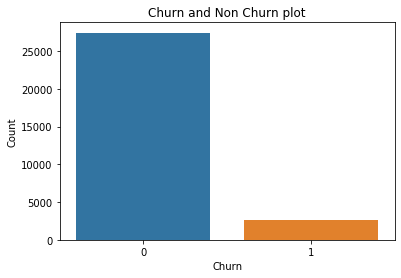

In [137]:
# CHURN BAR PLOT
sns.countplot(x='churn',data=df)
plt.ylabel('Count')
plt.xlabel('Churn')
plt.title('Churn and Non Churn plot')

C:\Users\sr069609\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sr069609\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


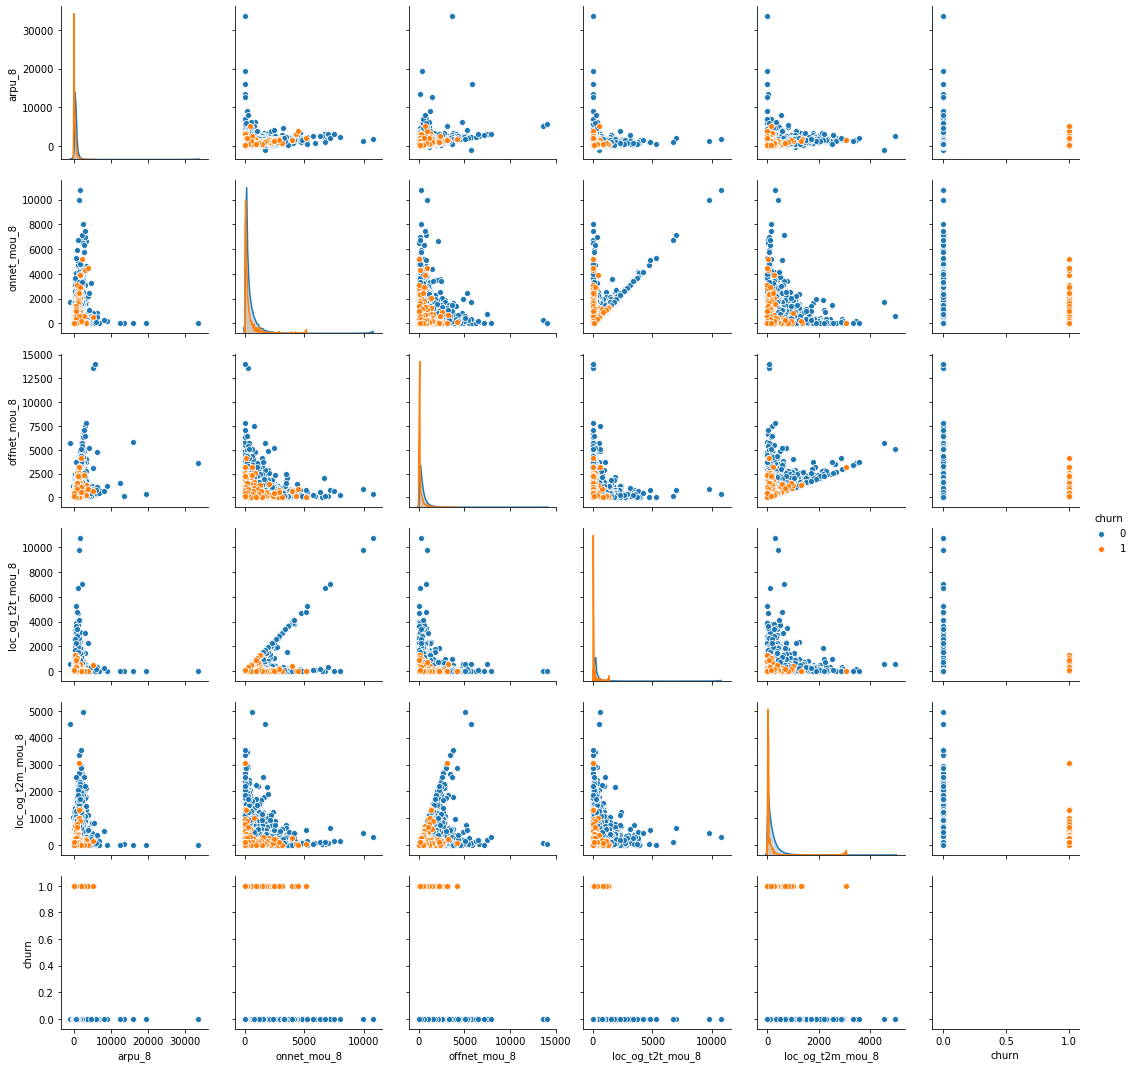

In [139]:
#plotting graph of different columns versus churn column
sns.pairplot(data=df[['arpu_8','onnet_mou_8','offnet_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','churn']],hue='churn')

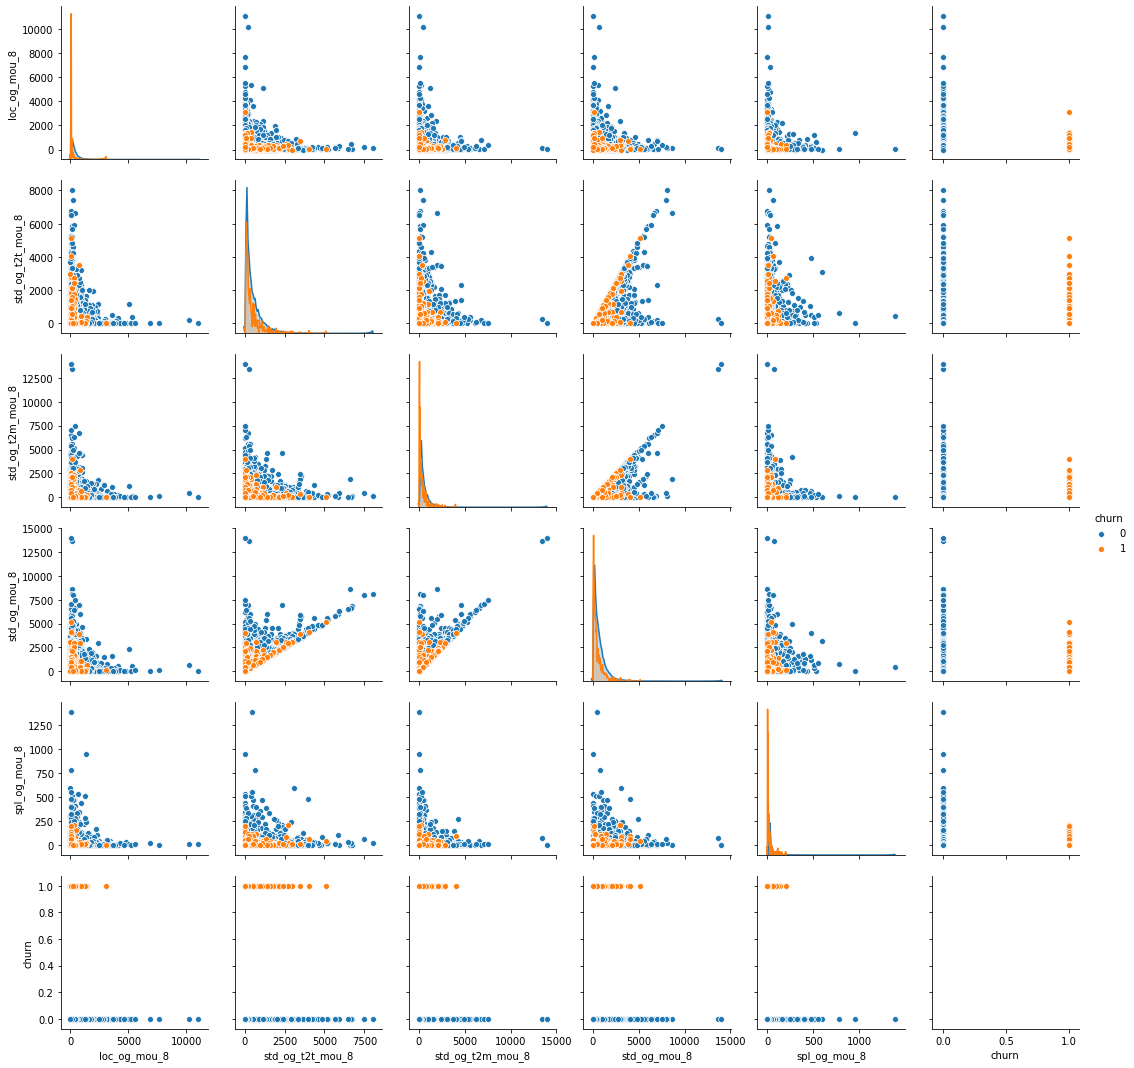

In [141]:
sns.pairplot(data=df[['loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_mou_8','spl_og_mou_8','churn']]
             ,hue='churn')

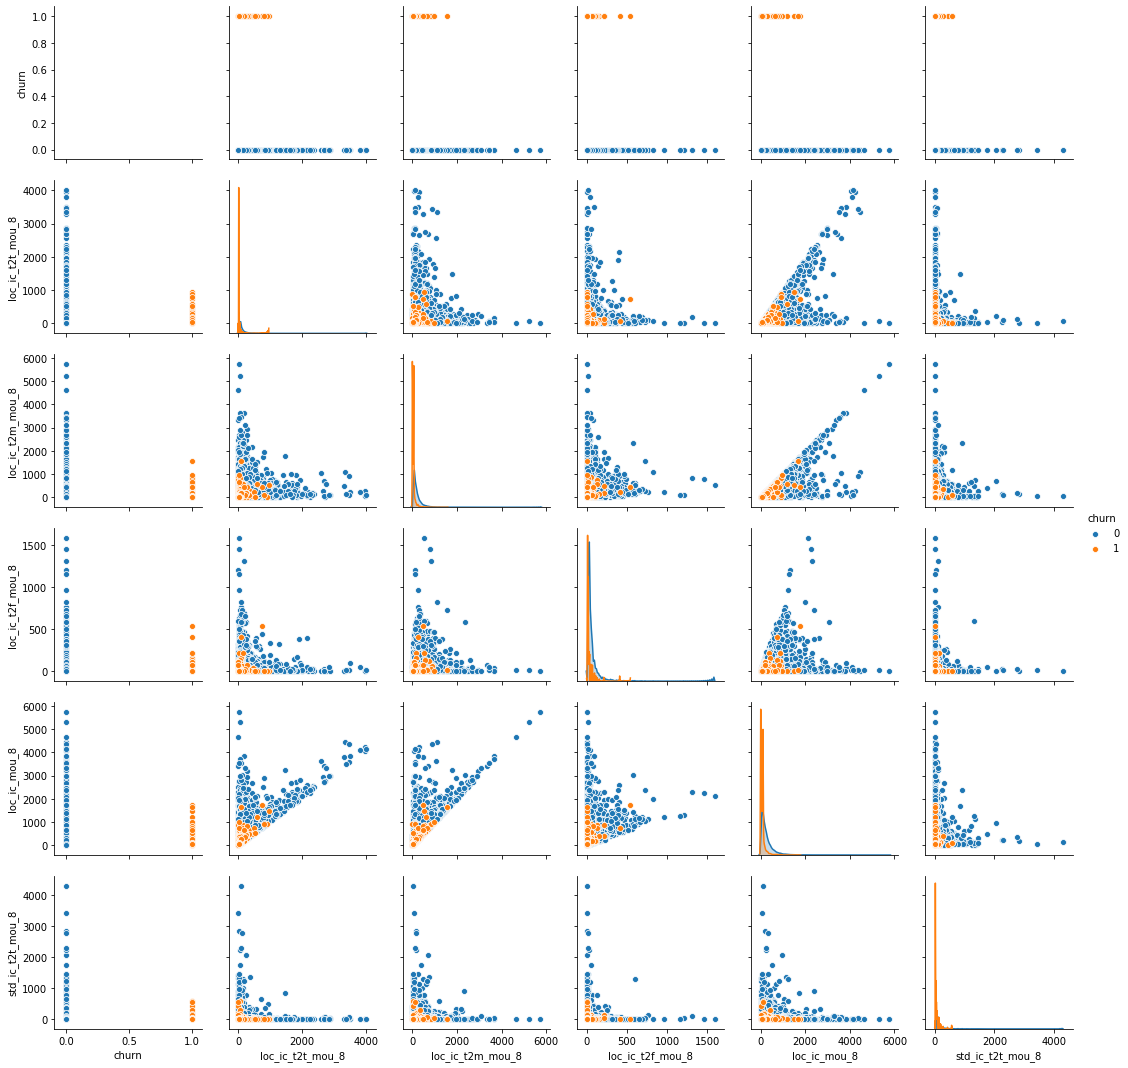

In [143]:
sns.pairplot(data=df[['churn','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8',
                              'std_ic_t2t_mou_8']],hue='churn')

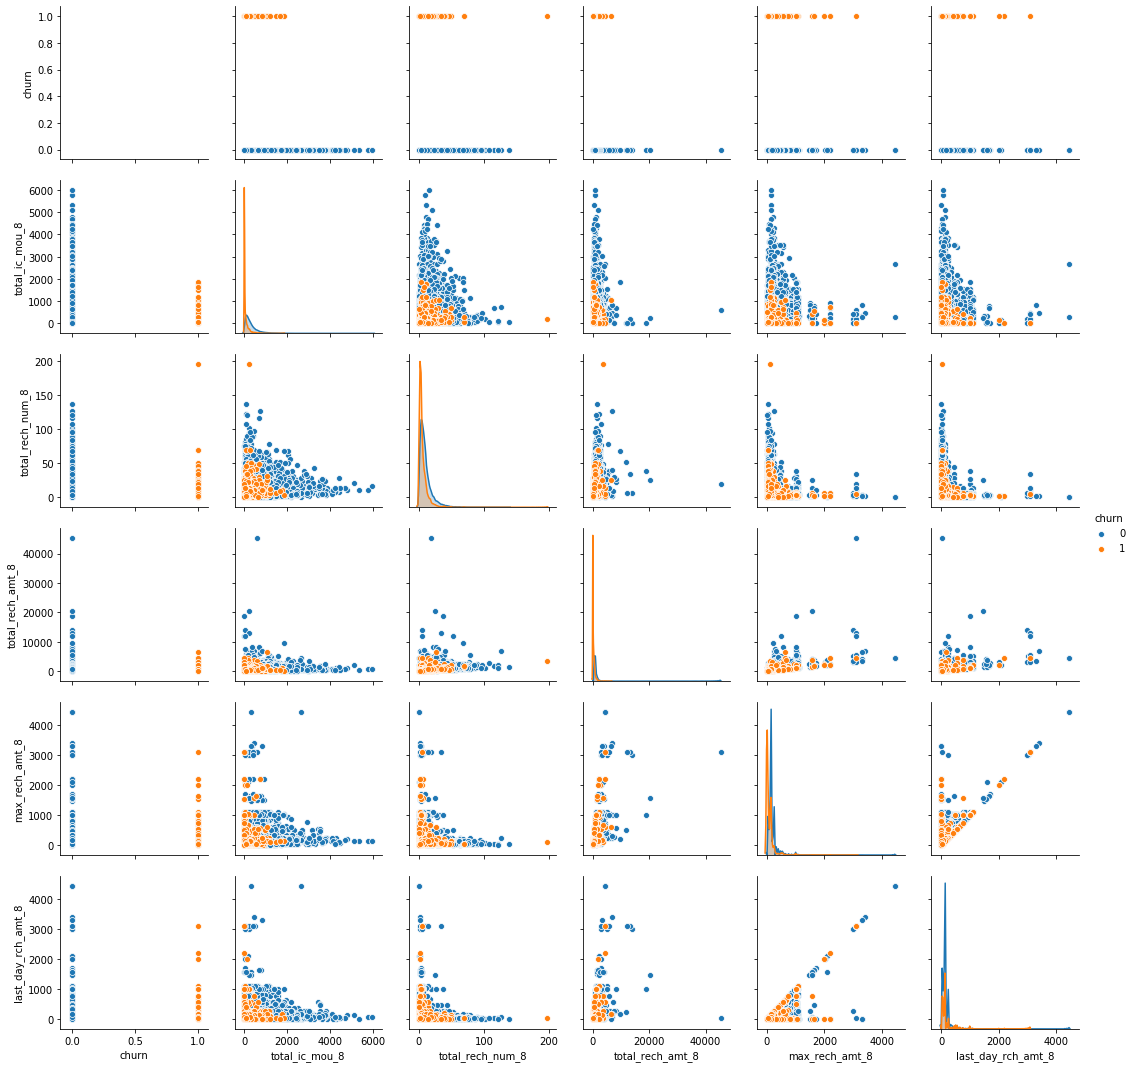

In [144]:
sns.pairplot(data=df[['churn','total_ic_mou_8','total_rech_num_8','total_rech_amt_8','max_rech_amt_8',
                              'last_day_rch_amt_8']],hue='churn')

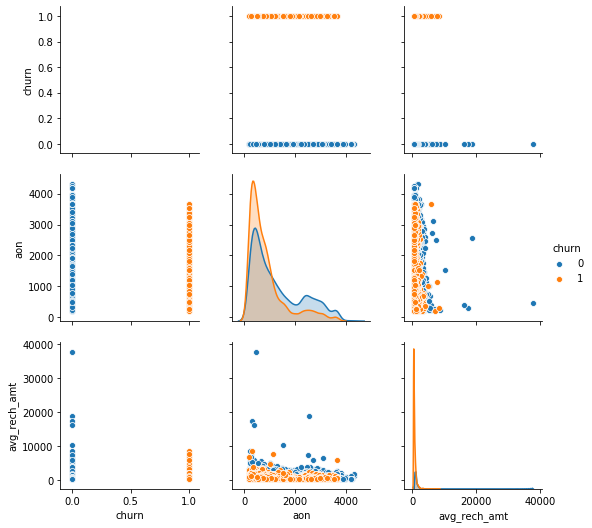

In [145]:
sns.pairplot(data=df[['churn','aon','avg_rech_amt']],hue='churn')

#### Observation
FROM ABOVE PLOTS WE CAN OBSERVE SOME CHURN POINTS EXIT IN VERY HIGH VALUES OF FEATURE, SO IF WE DO OUTLIERS TREATEMENT WE MAY LOOSE CHURN DATA

In [146]:
# FUNCTION TO PLOT CATAGORICAL VALUE vs COUNT
def countplot_sns(col,p):
    plt.subplot(8,5,p)
    sns.countplot(x=col,data=df)

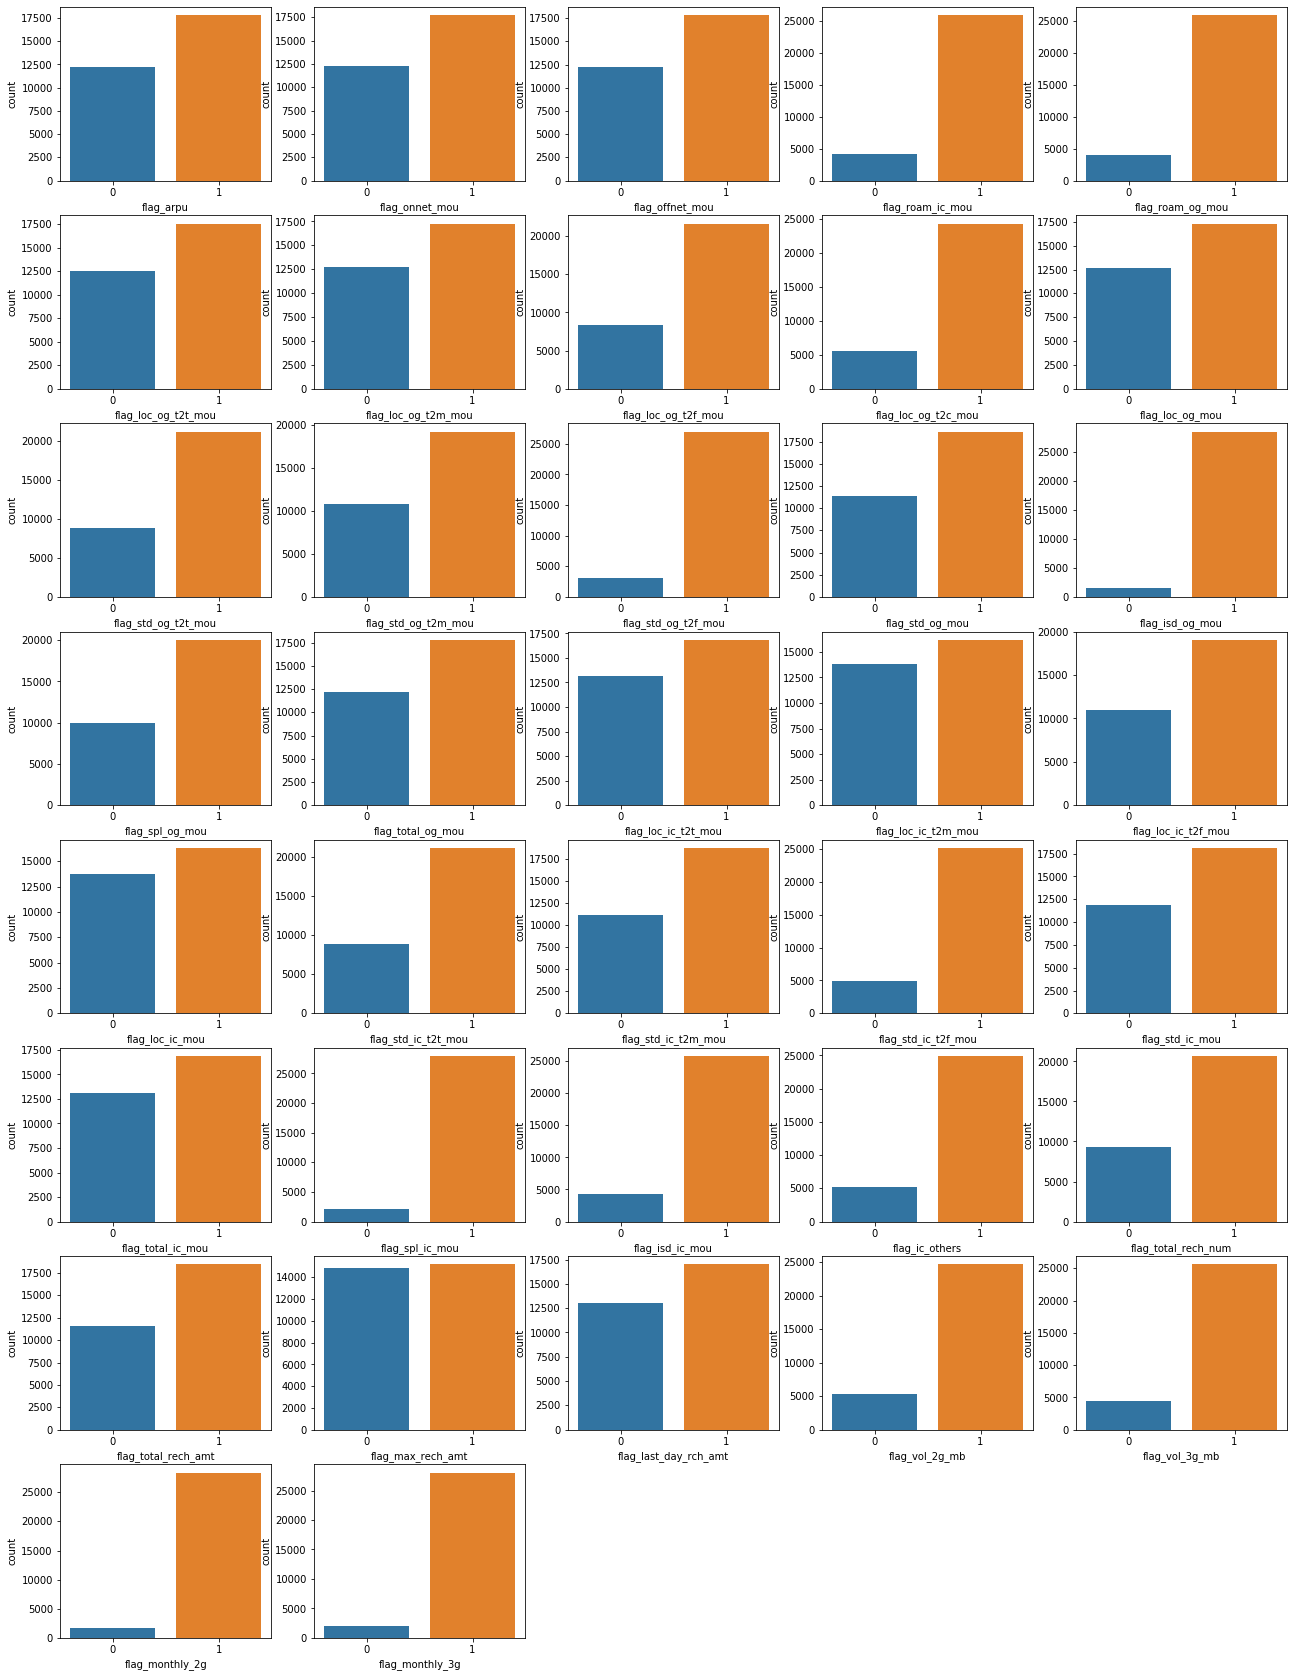

In [147]:
# 0 IS 8th MONTH DATA WHICH IS GOOD CUSTOMERS AND 1 IS WHEN 8th MONTH IS LESSTHAN AVG OF 6&7 MONTH.
# FROM BELOW GRAPS WE CAN SAY WHICH FEATURE DONE BAD IN MONTH OF 8th
plt.figure(figsize=(22,30))
flag_col=list(df.filter(regex='flag'))
p=1
for f in flag_col:
    countplot_sns(f,p)
    p+=1

#### Observations
THE GRAPHS WHICH HAD HUGE VARIANCE BETWEEN 0 & 1 ARE DOING VERY BAD IN 8th MONTH.
flag_montly_3g COLUMN ~500 USERS DOING GOOD IN 8th MONTH WHEN COMPARED TO 6 & 7 MONTHS

In [148]:
#To check outlier
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,monthly_3g_8,aon,avg_rech_amt,avg_arpu,avg_onnet_mou,avg_offnet_mou,avg_roam_ic_mou,avg_roam_og_mou,avg_loc_og_t2t_mou,avg_loc_og_t2m_mou,avg_loc_og_t2f_mou,avg_loc_og_t2c_mou,avg_loc_og_mou,avg_std_og_t2t_mou,avg_std_og_t2m_mou,avg_std_og_t2f_mou,avg_std_og_mou,avg_isd_og_mou,avg_spl_og_mou,avg_og_others,avg_total_og_mou,avg_loc_ic_t2t_mou,avg_loc_ic_t2m_mou,avg_loc_ic_t2f_mou,avg_loc_ic_mou,avg_std_ic_t2t_mou,avg_std_ic_t2m_mou,avg_std_ic_t2f_mou,avg_std_ic_mou,avg_total_ic_mou,avg_spl_ic_mou,avg_isd_ic_mou,avg_ic_others,avg_total_rech_num,avg_total_rech_amt,avg_max_rech_amt,avg_last_day_rch_amt,avg_vol_2g_mb,avg_vol_3g_mb,avg_monthly_2g,avg_monthly_3g,onnet_mou_7_6,offnet_mou_7_6,roam_ic_mou_7_6,roam_og_mou_7_6,loc_og_t2t_mou_7_6,loc_og_t2m_mou_7_6,loc_og_t2f_mou_7_6,loc_og_t2c_mou_7_6,loc_og_mou_7_6,std_og_t2t_mou_7_6,std_og_t2m_mou_7_6,std_og_t2f_mou_7_6,std_og_mou_7_6,isd_og_mou_7_6,spl_og_mou_7_6,og_others_7_6,total_og_mou_7_6,loc_ic_t2t_mou_7_6,loc_ic_t2m_mou_7_6,loc_ic_t2f_mou_7_6,loc_ic_mou_7_6,std_ic_t2t_mou_7_6,std_ic_t2m_mou_7_6,std_ic_t2f_mou_7_6,std_ic_mou_7_6,total_ic_mou_7_6,spl_ic_mou_7_6,isd_ic_mou_7_6,ic_others_7_6,total_rech_num_7_6,total_rech_amt_7_6,max_rech_amt_7_6,last_day_rch_amt_7_6,vol_2g_mb_7_6,vol_3g_mb_7_6,monthly_2g_7_6,monthly_3g_7_6,onnet_mou_8_7,offnet_mou_8_7,roam_ic_mou_8_7,roam_og_mou_8_7,loc_og_t2t_mou_8_7,loc_og_t2m_mou_8_7,loc_og_t2f_mou_8_7,loc_og_t2c_mou_8_7,loc_og_mou_8_7,std_og_t2t_mou_8_7,std_og_t2m_mou_8_7,std_og_t2f_mou_8_7,std_og_mou_8_7,isd_og_mou_8_7,spl_og_mou_8_7,total_og_mou_8_7,loc_ic_t2t_mou_8_7,loc_ic_t2m_mou_8_7,loc_ic_t2f_mou_8_7,loc_ic_mou_8_7,std_ic_t2t_mou_8_7,std_ic_t2m_mou_8_7,std_ic_t2f_mou_8_7,std_ic_mou_8_7,total_ic_mou_8_7,spl_ic_mou_8_7,isd_ic_mou_8_7,ic_others_8_7,total_rech_num_8_7,total_rech_amt_8_7,max_rech_amt_8_7,last_day_rch_amt_8_7,vol_2g_mb_8_7,vol_3g_mb_8_7,monthly_2g_8_7,monthly_3g_8_7
count,3.001100e+04,30011.000000,30011.00000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011

In [149]:
import warnings
warnings.filterwarnings("ignore")

###  Model Building

In [150]:
# STORING MOBILE NUMBER TO SEPEARTE COLUMN IT IS UNIQUE VALUE IT WILL NOT ADD ANY VALUE TO MODEL.
mobile_number=df.pop('mobile_number')

In [151]:
# CREATING INDEPENDENT AND DEPENDENT VARIABLES FROM  THE DATASET
y_df=df.pop('churn')
x_df=df
print(y_df.shape)
print(x_df.shape)

(30011,)
(30011, 187)


#### Train Test Split

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df, train_size=0.7,test_size=0.3,random_state=100)
print('Train')
print(x_train.shape,y_train.shape)
print('Test')
print(x_test.shape,y_test.shape)

Train
(21007, 187) (21007,)
Test
(9004, 187) (9004,)


#### Scaling the data

In [155]:
scaller=StandardScaler()
x_train_scale=scaller.fit_transform(x_train)
x_test_scale=scaller.transform(x_test)

#### PCA

In [156]:
pca = PCA(svd_solver='randomized',random_state=42)

In [157]:
# DOING THE PCA ON THE TRAIN DATA WE SHOULD NOT EXPOSE TEST DATA.
pca.fit(x_train_scale)

PCA(random_state=42, svd_solver='randomized')

In [158]:
#igen values and it is eigen vector
pca.components_

array([[ 1.90592100e-01,  1.26555295e-01,  1.65061939e-01, ...,
        -4.06403601e-02, -1.90263768e-02, -3.83863736e-02],
       [ 7.48307858e-02,  1.42206477e-01,  1.01809526e-01, ...,
         6.43143881e-02,  3.88777026e-02,  4.84018342e-02],
       [ 9.49542245e-02, -2.06310718e-02,  3.88442822e-02, ...,
        -4.33371463e-02, -1.52434995e-02, -4.32255238e-02],
       ...,
       [-0.00000000e+00, -1.38463949e-03, -5.87688587e-02, ...,
         6.24500451e-17, -1.38777878e-17,  1.94289029e-16],
       [ 0.00000000e+00,  1.06148285e-01, -1.49845629e-01, ...,
        -1.04950770e-16, -2.42861287e-17, -1.24900090e-16],
       [-0.00000000e+00, -5.30696061e-02,  5.56902482e-02, ...,
         5.00901404e-17,  3.46944695e-18,  1.04083409e-16]])

In [159]:
#calculated the variance
pca.explained_variance_ratio_

array([6.90022925e-02, 4.70362786e-02, 4.61783830e-02, 3.34462510e-02,
       2.83415697e-02, 2.34726408e-02, 2.26856017e-02, 1.94361877e-02,
       1.87685662e-02, 1.81832772e-02, 1.72879929e-02, 1.63041192e-02,
       1.56026350e-02, 1.55211756e-02, 1.41293892e-02, 1.40468133e-02,
       1.37602016e-02, 1.35026012e-02, 1.34003225e-02, 1.26925056e-02,
       1.23554859e-02, 1.19870525e-02, 1.18554079e-02, 1.15646715e-02,
       1.14215314e-02, 1.13136139e-02, 1.12072335e-02, 1.08825515e-02,
       1.04132565e-02, 1.02965386e-02, 1.00159714e-02, 9.68601667e-03,
       9.35097278e-03, 9.17537075e-03, 8.84949715e-03, 8.63808727e-03,
       8.61023008e-03, 8.42447749e-03, 8.21962354e-03, 8.07821496e-03,
       7.89528079e-03, 7.79155017e-03, 7.52747495e-03, 7.47979452e-03,
       7.29275394e-03, 7.28426714e-03, 7.10282684e-03, 6.90087787e-03,
       6.78173394e-03, 6.59850512e-03, 6.52131712e-03, 6.44776410e-03,
       6.16312671e-03, 6.02620702e-03, 5.93682352e-03, 5.91766407e-03,
      

In [160]:
#calculating the cummulative sum of variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

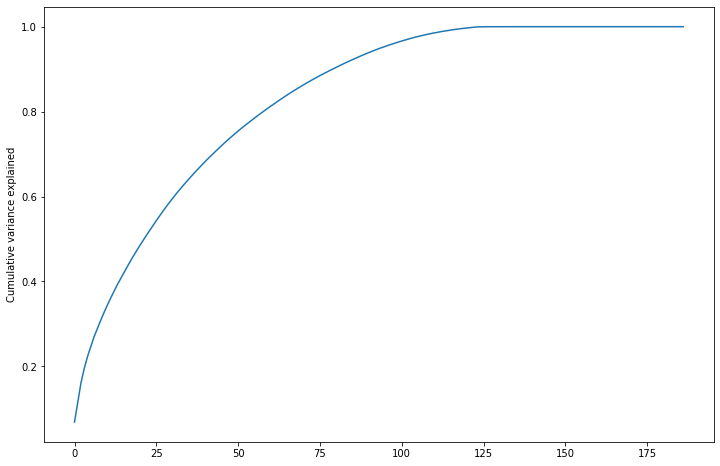

In [161]:
# PLOTTING GRAPH BETWEEN VARIANCE vs FEATURES
# 83% OF VARIANCE COVERED BY 75 FEATURES
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [162]:
# USING INCREMENTAL PCA FOR EFFICIENCY FOR  LARGER DATASETS
pca_final = IncrementalPCA(n_components=75)

In [163]:
# FROM TRAIN DATA WE GET 75 FEATURES WITH OUT LOOSING VARIANCE
x_train_scale_pca = pca_final.fit_transform(x_train_scale)
x_train_scale_pca.shape

(21007, 75)

In [164]:
# APPLYING SELECTED COMPONENTS TO THE TEST DATA
x_test_scale_pca = pca_final.transform(x_test_scale)
x_test_scale_pca.shape

(9004, 75)

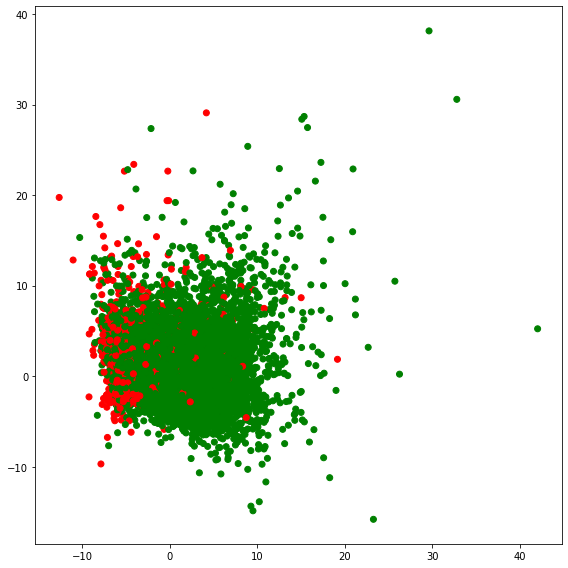

In [165]:
# BELOW WE CAN OBSERVE CHURN AND NON CHURN DISTRIBUTION
fig = plt.figure(figsize = (8,8))
plt.scatter(x_train_scale_pca[:,0], x_train_scale_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.tight_layout()
plt.show()

###  Logestic Regression With PCA
#### Hyperparameter Tunning

In [166]:
pca = PCA()
# The class weight is used to handle class imbalance.
logistic = LogisticRegression(class_weight='balanced')
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)]
# compile pipeline
pca_logistic = Pipeline(steps)
# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
# create 5 folds
#To treat imbalance (91% is 0 and 8% is 1) we use stratifiedKFlod
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [167]:
# fit model
model.fit(x_train_scale_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   29.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [168]:
# fit model
model.fit(x_train_scale_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   12.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [170]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8774958104289237
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [169]:
# predict churn on test data
y_pred = model.predict(x_test_scale_pca)
# create cnfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
TN = cm[0,0] # true positive 
TP = cm[1,1] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
print('Accuracy Score           : ', round(100*accuracy_score(y_test,y_pred)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity              : ', round(100*TP/float(TP+FN),2))
# Let us calculate specificity
print('Specificity              : ',round(100*TN/float(TN+FP),2))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate       : ',round(100*FP/ float(TN+FP)))
# positive predictive value 
print('positive predictive value: ', round(100*TP / float(TP+FP)))
# Negative predictive value
print('Negative predictive value: ',round(100*TN / float(TN+ FN)))
# Misclassification rate
print('Misclassification Rate   : ',round(100*(FN+FP)/(TP+TN+FP+FN)))
#precision
print('precision                : ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall                   : ',round(100*TP/float(TP+ FN)))
# check area under curve
y_pred_prob = model.predict_proba(x_test_scale_pca)[:, 1]
print('AUC                      : ', round(100*roc_auc_score(y_test, y_pred_prob),2))

[[6655 1579]
 [ 106  664]]
Accuracy Score           :  81.0
Sensitivity              :  86.23
Specificity              :  80.82
false postive rate       :  19.0
positive predictive value:  30.0
Negative predictive value:  98.0
Misclassification Rate   :  19.0
precision                :  30.0
Recall                   :  86.0
AUC                      :  89.87


### Random Forest With PCA

In [171]:
# Tthe class weight is used to handle class imbalance
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)
# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [172]:
# fit model
model.fit(x_train_scale_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [176]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8981246861982072
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [177]:
# predict churn on test data
y_pred = model.predict(x_test_scale_pca)
# create onfusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(100*sensitivity, 2), "\n", "Specificity: \t", round(100*specificity, 2), sep='')
# check area under curve
y_pred_prob = model.predict_proba(x_test_scale_pca)[:, 1]
print("AUC:           ", round(100*roc_auc_score(y_test, y_pred_prob),2))

[[8149   85]
 [ 554  216]]
Sensitivity: 	28.05
Specificity: 	98.97
AUC:            91.7


#### SENSITIVITYIS TOO LOW. THE BEST MODEL IS PCA ALONG WITH LOGISTIC REGRESSION.

### Decision Tree With PCA

In [178]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(x_train_scale_pca,y_train)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 16.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [179]:
y_pred_default = grid_search.predict(x_test_scale_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6967, 1267],
       [ 211,  559]], dtype=int64)

In [180]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))
#precision
print('precision: ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall: ',round(100*TP/float(TP+ FN)))

Sensitivity:  0.7259740259740259
Specificity:  0.8461258197716784
false postive rate:  0.15387418022832158
positive predictive value:  0.30613362541073386
Negative predictive value:  0.9706046252438005
Misclassification Rate:  0.1641492669924478
precision:  31.0
Recall:  73.0


#### BEST MODEL IN LOGISTIC,RANDOMFOREST AND DECISION MODEL ALONG WITH PCA


LOGISTIC MODEL PERFORMED GOOD WEN COMPARED TO OTHER MODELS IN TERMS OF PRECISION,SENSITICITY TERMS.<br>
Accuracy Score : 81.0 <br>
Sensitivity : 86.23<br>
Specificity : 80.82<br>
false postive rate : 19.0<br>
positive predictive value: 30.0<br>
Negative predictive value: 98.0<br>
Misclassification Rate : 19.0<br>
precision : 30.0<br>
Recall : 86.0<br>
AUC : 89.87

### Random Forest on All Features - without PCA

In [181]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [182]:
# fit
rfc.fit(x_train_scale,y_train)

RandomForestClassifier(class_weight='balanced')

In [183]:
# Making predictions
predictions = rfc.predict(x_test_scale)

In [184]:
# Importing classification report and confusion matrix from sklearn metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8234
           1       0.78      0.44      0.56       770

    accuracy                           0.94      9004
   macro avg       0.87      0.71      0.76      9004
weighted avg       0.94      0.94      0.93      9004

[[8140   94]
 [ 433  337]]
0.9414704575744114


In [185]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

array([[8140,   94],
       [ 433,  337]], dtype=int64)

In [186]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives
print('Accuracy Score           : ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity              : ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity              : ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate       : ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
# Misclassification rate
print('Misclassification Rate   : ',(FN+FP)/(TP+TN+FP+FN))
#precision
print('precision                : ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall                   : ',round(100*TP/float(TP+ FN)))

Accuracy Score           :  0.9414704575744114
Sensitivity              :  0.43766233766233764
Specificity              :  0.9885839203303376
false postive rate       :  0.011416079669662375
positive predictive value:  0.7819025522041764
Negative predictive value:  0.9494925930246122
Misclassification Rate   :  0.05852954242558863
precision                :  78.0
Recall                   :  44.0


#### Hyperparamater Tunning

In [187]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)

In [188]:
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [189]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.200346,0.863375,0.182341,0.015484,2,{'max_depth': 2},0.883389,0.869110,0.879552,0.863842,0.875982,0.874375,0.007061,4,0.884856,0.874502,0.874866,0.867250,0.881173,0.876529,0.006064
1,21.686412,3.155381,0.196202,0.031058,7,{'max_depth': 7},0.915992,0.913851,0.919781,0.912164,0.915972,0.915552,0.002555,3,0.930616,0.932996,0.929311,0.928002,0.931929,0.930571,0.001784
2,31.437547,3.384658,0.228657,0.037953,12,{'max_depth': 12},0.936221,0.933127,0.935968,0.933825,0.931683,0.934165,0.001722,2,0.970306,0.969830,0.967452,0.968583,0.969773,0.969189,0.001038
3,29.973873,2.885345,0.170807,0.030645,17,{'max_depth': 17},0.940267,0.936221,0.940014,0.938110,0.934777,0.937878,0.002130,1,0.981732,0.981851,0.980424,0.980424,0.981078,0.981102,0.000613


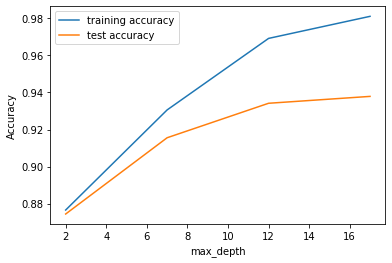

In [190]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [191]:
# GridSearchCV to find optimal n_estimators
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1000, 400)},
             return_train_score=True, scoring='accuracy')

In [192]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,24.842820,1.250150,0.196396,0.046519,100,{'n_estimators': 100},0.931223,0.926940,0.929779,0.928826,0.927874,0.928928,0.001488,3,0.958108,0.958822,0.956980,0.958170,0.960371,0.958490,0.001112
1,129.673618,6.662146,1.000497,0.098484,500,{'n_estimators': 500},0.931699,0.927653,0.931683,0.930969,0.929541,0.930309,0.001543,2,0.959476,0.960607,0.957813,0.958586,0.960252,0.959347,0.001035
2,199.320587,20.377171,1.200336,0.115139,900,{'n_estimators': 900},0.932651,0.927416,0.932635,0.930255,0.929779,0.930547,0.001963,1,0.959179,0.959893,0.958586,0.958348,0.960966,0.959394,0.000950


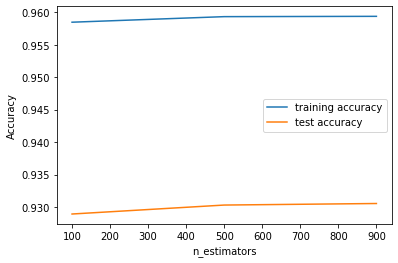

In [193]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [194]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [195]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.607275,0.178529,0.135805,0.005478,4,{'max_features': 4},0.925036,0.917896,0.926446,0.923828,0.923114,0.923264,0.002913,5,0.947932,0.948170,0.947519,0.946091,0.947102,0.947363,0.000733
1,10.680966,0.240528,0.134026,0.011559,8,{'max_features': 8},0.930509,0.923608,0.930017,0.927160,0.926922,0.927643,0.002485,4,0.957037,0.956858,0.955076,0.954778,0.955314,0.955812,0.000944
2,17.176055,0.159367,0.119799,0.002313,14,{'max_features': 14},0.932413,0.927416,0.930731,0.929065,0.927398,0.929404,0.001945,3,0.958941,0.960012,0.958229,0.958229,0.959419,0.958966,0.000691
3,23.957929,0.272492,0.120052,0.009630,20,{'max_features': 20},0.931461,0.929319,0.933825,0.930731,0.930017,0.931071,0.001551,1,0.959655,0.962214,0.958943,0.959955,0.961561,0.960466,0.001224
4,28.857390,0.145788,0.116732,0.004783,24,{'max_features': 24},0.931937,0.928843,0.933111,0.930017,0.930493,0.930880,0.001493,2,0.960369,0.960726,0.959300,0.960609,0.961026,0.960406,0.000592


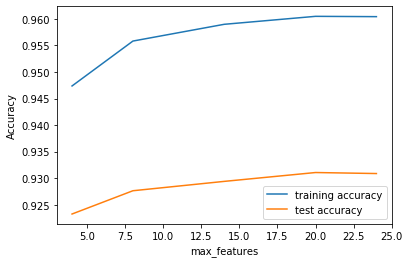

In [196]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [197]:
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [198]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.544756,0.381285,0.110959,0.002093,100,{'min_samples_leaf': 100},0.890290,0.888149,0.897405,0.887408,0.890740,0.890798,0.003534,1,0.896578,0.900149,0.897120,0.895990,0.894799,0.896927,0.001786
1,12.283198,0.325341,0.112960,0.012357,150,{'min_samples_leaf': 150},0.882913,0.882913,0.893121,0.885265,0.886694,0.886181,0.003758,2,0.887295,0.893544,0.891943,0.889325,0.890277,0.890477,0.002147
2,11.302114,0.113485,0.103002,0.005003,200,{'min_samples_leaf': 200},0.877915,0.882437,0.887170,0.880267,0.884313,0.882420,0.003196,3,0.884261,0.890747,0.887183,0.883672,0.888492,0.886871,0.002638
3,10.871963,0.204085,0.108848,0.008219,250,{'min_samples_leaf': 250},0.879343,0.876725,0.885027,0.878838,0.877172,0.879421,0.002970,4,0.883725,0.886046,0.882780,0.882720,0.881173,0.883289,0.001603
4,10.192756,0.231468,0.106556,0.008351,300,{'min_samples_leaf': 300},0.874346,0.876725,0.886218,0.874078,0.881457,0.878565,0.004653,5,0.879857,0.882654,0.877603,0.877187,0.884327,0.880326,0.002790


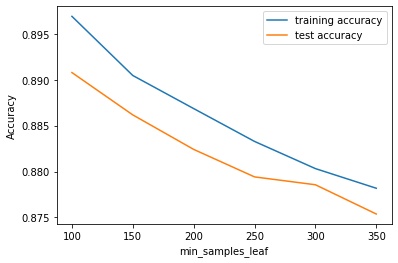

In [199]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [200]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(100, 700, 50)},
             return_train_score=True, scoring='accuracy')

In [201]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.336510,0.329734,0.130192,0.002851,100,{'min_samples_split': 100},0.924322,0.920752,0.926208,0.917163,0.923828,0.922454,0.003174,1,0.945671,0.948825,0.946210,0.946686,0.948233,0.947125,0.001205
1,19.569688,0.303515,0.122741,0.003181,150,{'min_samples_split': 150},0.914564,0.914089,0.915734,0.912878,0.917401,0.914933,0.001536,2,0.931568,0.933175,0.931215,0.932703,0.932167,0.932165,0.000717
2,19.191910,0.641573,0.125821,0.004689,200,{'min_samples_split': 200},0.905759,0.907187,0.911688,0.902642,0.907641,0.906983,0.002931,3,0.920738,0.922880,0.921100,0.921159,0.919850,0.921145,0.000985
3,19.087195,0.217866,0.122321,0.007628,250,{'min_samples_split': 250},0.902427,0.899334,0.906927,0.898596,0.903594,0.902176,0.003018,4,0.913240,0.914192,0.912531,0.912650,0.915328,0.913588,0.001050
4,18.704900,0.565658,0.131731,0.009876,300,{'min_samples_split': 300},0.896716,0.894812,0.902642,0.898596,0.902404,0.899034,0.003091,5,0.907647,0.909551,0.908485,0.907117,0.909140,0.908388,0.000905


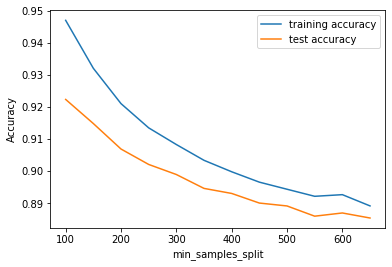

In [202]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [203]:
# model with the best hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1,return_train_score=True)

In [204]:
# fit
grid_search.fit(x_train_scale,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 27.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12], 'max_features': [15, 20],
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': [300, 400, 500]},
             refit='recall_score', return_train_score=True, verbose=1)

In [205]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8851810751962247 using {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 400}


In [206]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=15,
                             n_estimators=500)

In [207]:
# fit
rfc_final.fit(x_train_scale,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=15,
                       min_samples_leaf=150, min_samples_split=300,
                       n_estimators=500)

In [208]:
# predict
predictions = rfc_final.predict(x_test_scale)

In [209]:
confusion_rm_f = confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7355,  879],
       [ 125,  645]], dtype=int64)

In [210]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives
print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))
#precision
print('precision: ',round(100*TP / float(TP+ FP)))
#Recall
print('Recall: ',round(100*TP/float(TP+ FN)))

Accuracy Score:  0.8884940026654821
Sensitivity:  0.8376623376623377
Specificity:  0.8932475103230507
false postive rate:  0.10675248967694924
positive predictive value:  0.42322834645669294
Negative predictive value:  0.9832887700534759
Misclassification Rate:  0.11150599733451799
precision:  42.0
Recall:  84.0


In [211]:
#Important Variables
feature_names=list(x_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [ ]:
df.columns

In [212]:
#Variable Importance top 12 variable
dic= dict(d_descending)
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=12
n_items = take(n, dic.items())

In [213]:
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('total_ic_mou_8', 0.0857509465548705), ('total_og_mou_8', 0.074339495601766), ('total_rech_amt_8', 0.05970962825498933), ('arpu_8', 0.05444047887481945), ('last_day_rch_amt_8', 0.04727039033436653), ('loc_og_mou_8', 0.04424135436502686), ('loc_ic_t2m_mou_8', 0.042793014621034735), ('loc_ic_mou_8', 0.04163793078491602), ('loc_og_t2m_mou_8', 0.036487819768419395), ('total_og_mou_8_7', 0.028701337263996297), ('loc_og_t2t_mou_8', 0.026602624217591943), ('roam_og_mou_8', 0.02619312556176065)]


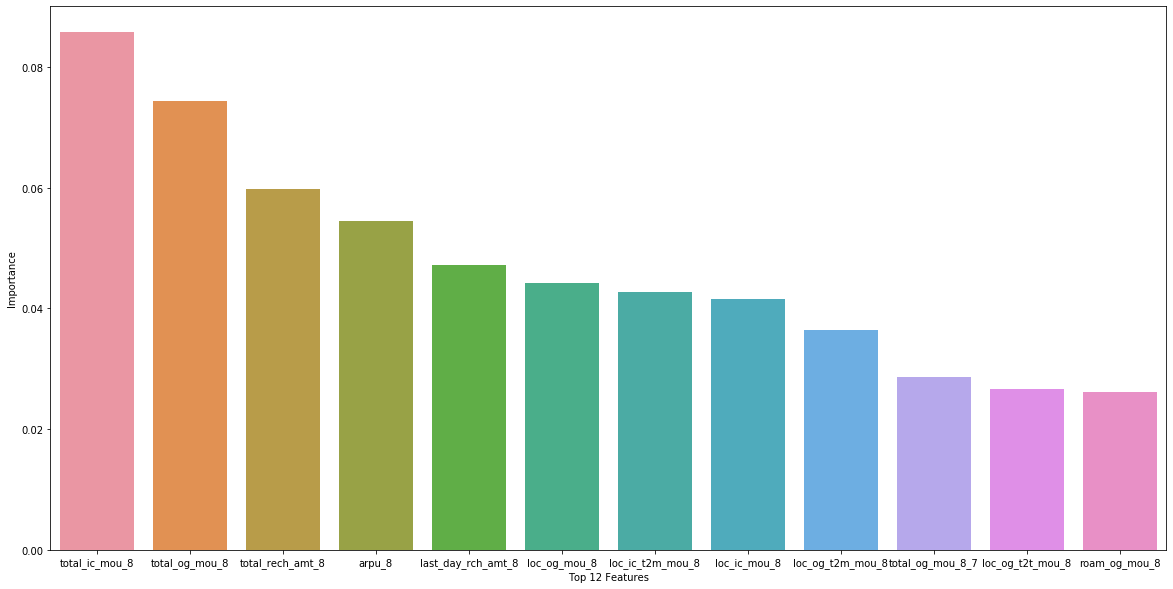

In [214]:
imp=rfc_final.feature_importances_
names=x_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

### OBSERVATIONS TO BUSINESS
THE FALLOWING FEATURES ARE IMPORTANT FOR CHURN IDENTIFICATION.<br>
•total_ic_mou_8<br>
•total_og_mou_8<br>
•total_rech_amt_8<br>
•last_day_rch_amt_8<br>
•loc_ic_t2m_mou_8<br>
•arpu_8<br>
•loc_ic_mou_8<br>
•loc_og_mou_8<br>
•loc_og_t2m_mou_8<br>
•loc_ic_t2t_mou_8<br>
•loc_og_t2t_mou_8<br>
•total_og_mou_8_7<br>
-->The Total minutes of usage for incoming and out going calls in a circle is key for identifying churn.<br>
-->When customer had low recharge than usual, the last day recharge amount is less for churn.<br>
-->The difference between out going calls for bad phase (8th Month) is less than good phase 7th Month.